In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=95088dc9e59e515e476064201717a6e039cb17c73939e21852549bea27172da2
  Stored in directory: c:\users\saman\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [23]:
#Installing yellow brick for model
!pip install yellowbrick
import warnings
warnings.filterwarnings("ignore")

In [24]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
target = df["koi_disposition"]
data_df = df.drop("koi_disposition", axis=1)
feature_names = data_df.columns
data_df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df, target, random_state=42)

In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [25]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model
# Logistic Regression Model


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [46]:
X_test_scaled = X_scaler.transform(X_test)

In [27]:
#Fitting data to the model
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [28]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8483692542437535
Testing Data Score: 0.8443935926773455


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [30]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.3s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.2s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.4s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.2s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.2s
[CV 1/5] END ................................C=5, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=5,

GridSearchCV(estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [31]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.8683919254251595


In [32]:
# Testing score:
grid.score(X_test, y_test)

0.8718535469107551

In [48]:
#Prediction and save to variable 
predictions = grid.predict(X_test_scaled)

In [49]:
#Classification Report
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.78      0.68      0.72       411
FALSE POSITIVE       0.76      0.81      0.79       484
     CANDIDATE       0.98      1.00      0.99       853

      accuracy                           0.87      1748
     macro avg       0.84      0.83      0.83      1748
  weighted avg       0.87      0.87      0.87      1748



<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

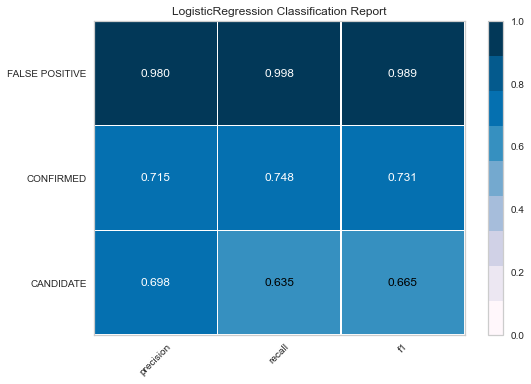

In [41]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="image_models/logistic_regression.png")

# Save the Model

In [43]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'models/sam_logisticmodel.sav'
joblib.dump(model, filename)

['models/sam_logisticmodel.sav']